In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
gradAd = pd.read_csv('Graduate Admissions.csv')
gradAd.drop('Serial No.',axis = 1,inplace = True)
gradAd.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
def bootstrap(sample,runs):
    ls = []
    n = sample.shape[0]
    for _ in range(runs):
        sum = 0
        for i in range(n):
            r = np.floor(np.random.random()*n)
            sum += sample[r]
        ls.append(sum/n)
    plt.hist(ls,bins = 100)
    ls.sort()
    return ls
def getbounds(ls,confidence):
    confidence /= 2
    n = len(ls)
    lb = int(np.floor(confidence * n)/100)
    ub = int(np.floor((100-confidence)*n/100))
    return ls[lb],ls[ub]

# **Analysis with GRE scores**

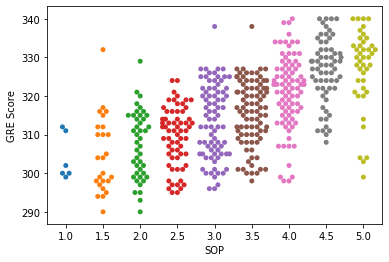

In [4]:
sns.swarmplot(y = 'GRE Score',x = 'SOP',data = gradAd)

In [5]:
mid = gradAd['GRE Score'].groupby(gradAd['SOP']).mean()

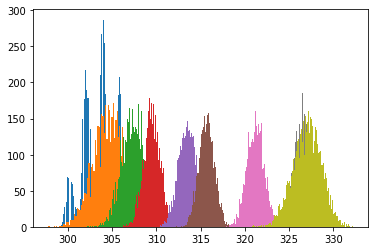

In [6]:
ls = []
lb = []
hb = []
for i in range(2,11):
    temp = gradAd['GRE Score'][gradAd['SOP']==i/2]
    temp.index = range(temp.shape[0])
    ls = bootstrap(temp,5000)
    l,h = getbounds(ls,5)
    lb.append(l)
    hb.append(h)

In [7]:
lb

[300.0,
 301.2,
 304.7906976744186,
 307.640625,
 311.475,
 313.97727272727275,
 319.29213483146066,
 324.4920634920635,
 323.7857142857143]

In [8]:
hb

[308.1666666666667,
 308.92,
 309.93023255813955,
 311.328125,
 315.6125,
 317.4318181818182,
 323.13483146067415,
 328.6031746031746,
 330.0]

In [9]:
mid.index = range(mid.shape[0])

In [10]:
mid

0    304.000000
1    304.840000
2    307.395349
3    309.562500
4    313.525000
5    315.693182
6    321.224719
7    326.571429
8    327.023810
Name: GRE Score, dtype: float64

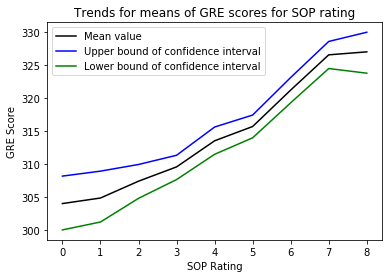

In [11]:
plt.title('Trends for means of GRE scores for SOP rating')
plt.xlabel('SOP Rating')
plt.ylabel('GRE Score')
plt.plot(mid,'black',hb,'blue',lb,'green')
plt.legend(('Mean value','Upper bound of confidence interval','Lower bound of confidence interval'))

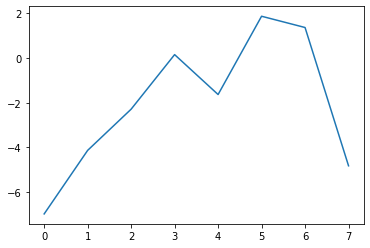

In [12]:
error = []
for i in range(len(lb)-1):
    error.append(lb[i+1]-hb[i])
plt.plot(error)

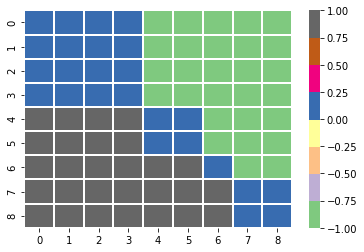

In [13]:
arr = np.zeros((9,9))
for i in range(arr.shape[0]):
    for j in range(arr.shape[1]):
        if lb[i]>hb[j]:
            arr[i][j] = 1
        elif lb[j]>hb[i]:
            arr[i][j] = -1
        else:
            arr[i][j] = 0
sns.heatmap(data = arr,cmap = "Accent",linewidths = 1)

# **Analysis with TOEFL scores**

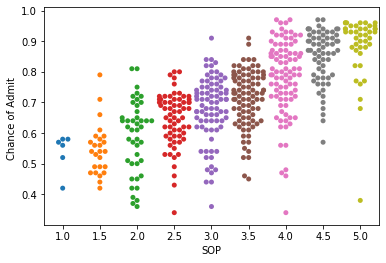

In [21]:
sns.swarmplot(y = 'Chance of Admit ',x = 'SOP',data = gradAd)

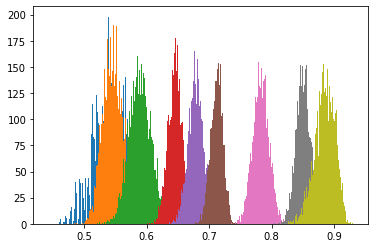

In [29]:
ls = []
lb = []
hb = []
for i in range(2,11):
    temp = gradAd['Chance of Admit '][gradAd['SOP']==i/2]
    temp.index = range(temp.shape[0])
    ls = bootstrap(temp,5000)
    l,h = getbounds(ls,5)
    lb.append(l)
    hb.append(h)

In [23]:
hb

[[1.0, 0.575],
 [1.5, 0.5820000000000001],
 [2.0, 0.623720930232558],
 [2.5, 0.6662500000000001],
 [3.0, 0.7012499999999997],
 [3.5, 0.7309090909090912],
 [4.0, 0.8074157303370784],
 [4.5, 0.8706349206349204],
 [5.0, 0.9130952380952382]]

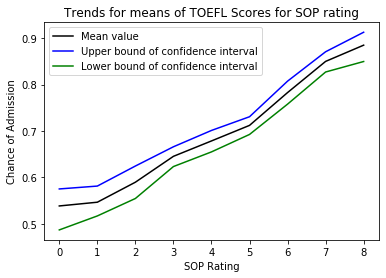

In [30]:
mid = gradAd['Chance of Admit '].groupby(gradAd['SOP']).mean()
mid.index = range(mid.shape[0])
plt.title('Trends for means of TOEFL Scores for SOP rating')
plt.xlabel('SOP Rating')
plt.ylabel('Chance of Admission')
plt.plot(mid,'black',hb,'blue',lb,'green')
plt.legend(('Mean value','Upper bound of confidence interval','Lower bound of confidence interval'))

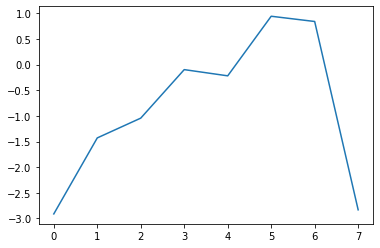

In [18]:
error = []
for i in range(len(lb)-1):
    error.append(lb[i+1]-hb[i])
plt.plot(error)

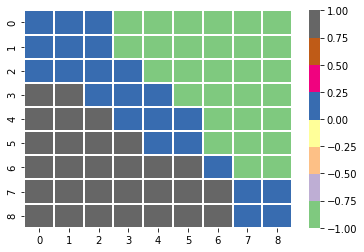

In [19]:
arr = np.zeros((9,9))
for i in range(arr.shape[0]):
    for j in range(arr.shape[1]):
        if lb[i]>hb[j]:
            arr[i][j] = 1
        elif lb[j]>hb[i]:
            arr[i][j] = -1
        else:
            arr[i][j] = 0
xlabels = 
sns.heatmap(data = arr,cmap = "Accent",linewidths = 1)